## K-Nearest Neigbors (KNN)

**Import the libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Import the dataset**

In [2]:
data =pd.read_csv('social_network_ads.csv')
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [3]:
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

**Splitting the dataset**

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

**Feature Scaling**

In [5]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_=sc.fit_transform(X_train)
X_test_=sc.transform(X_test)

**Train the KNN Model on the whole training set**

In [14]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier()
classifier.fit(X_train_,y_train)

KNeighborsClassifier()

**Predicting a new result**

In [7]:
input = sc.transform([[30,87000]])
print(classifier.predict(input))

[0]


**Predicting the test**

In [8]:
y_pred =  classifier.predict(X_test_)
table =pd.DataFrame(
{
   'Actual Purchase': y_test,
    'Predicted Purchase': y_pred
})
table.head()

,Actual Purchase,Predicted Purchase
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


**Making the confusion Matrix**

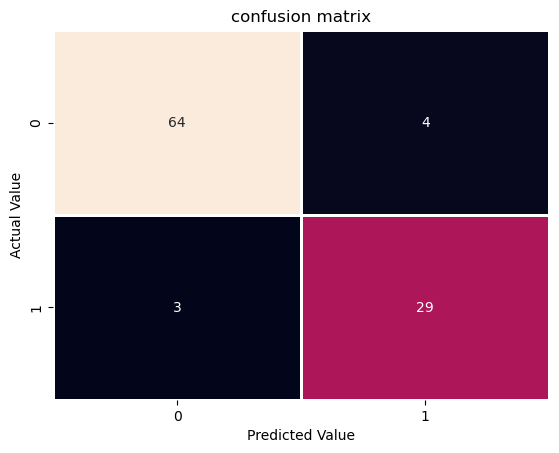

In [9]:
from sklearn.metrics import confusion_matrix,accuracy_score
conf=confusion_matrix(y_test,y_pred)
sns.heatmap(conf,annot=True,lw=.9,cbar=False)
plt.title('confusion matrix')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value');

In [10]:
print(accuracy_score(y_test,y_pred))

0.93


**Visualising Training Set Results**

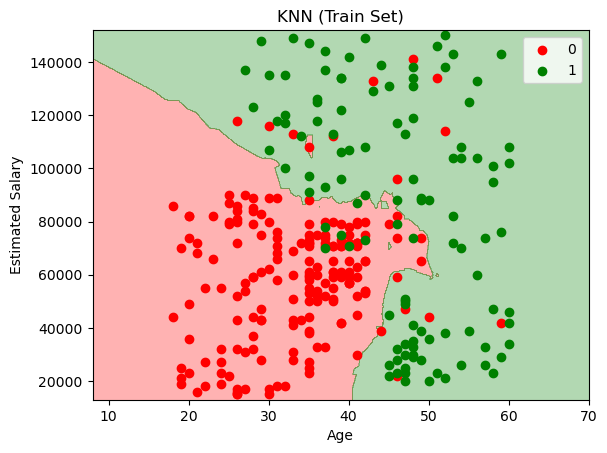

In [15]:
from matplotlib.colors import ListedColormap

X_set,y_set=X_train,y_train
X1,X2=np.meshgrid(np.linspace(X_set[:,0].min()-10,X_set[:,0].max()+10,1000),
                  np.linspace(X_set[:,1].min()-2000,X_set[:,1].max()+2000,1000),)
input = sc.transform(np.array([X1.ravel(),X2.ravel()]).T)
Z=classifier.predict(input)
plt.contourf(X1,X2,Z.reshape(X1.shape),levels=2,cmap=ListedColormap(('red','green')),alpha=.3)
for j in (np.unique(y_set)):
    plt.scatter(X_train[y_set==j,0],X_train[y_set==j,1],c=('red','green')[j],label=j)
plt.title('KNN (Train Set)')
plt.ylabel('Estimated Salary')
plt.xlabel('Age')
plt.legend();

**Visualising Test Set Results**

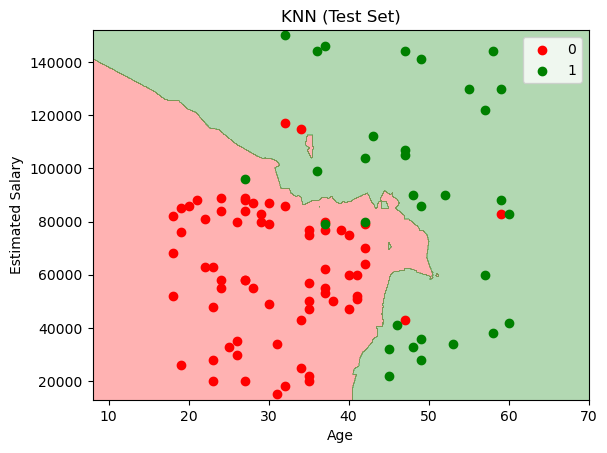

In [16]:
from matplotlib.colors import ListedColormap

X_set,y_set=X_train,y_train
X1,X2=np.meshgrid(np.linspace(X_set[:,0].min()-10,X_set[:,0].max()+10,1000),
                  np.linspace(X_set[:,1].min()-2000,X_set[:,1].max()+2000,1000),)
input = sc.transform(np.array([X1.ravel(),X2.ravel()]).T)
Z=classifier.predict(input)
plt.contourf(X1,X2,Z.reshape(X1.shape),levels=2,cmap=ListedColormap(('red','green')),alpha=.3)
for j in (np.unique(y_test)):
    plt.scatter(X_test[y_test==j,0],X_test[y_test==j,1],c=('red','green')[j],label=j)
plt.title('KNN (Test Set)')
plt.ylabel('Estimated Salary')
plt.xlabel('Age')
plt.legend();